## Data Importing

In [ ]:
import pandas as pd

# Load dataset
file_path = "https://gitlab.crio.do/me_notebook/me_jupyter_airbnbanalysis/-/raw/master/Airbnb_data.csv"
df = pd.read_csv(file_path)


In [ ]:
df.shape

(48895, 16)

## Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Handling Missing Values

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:

# Fill missing values where necessary
df["reviews_per_month"].fillna(0, inplace=True)  # Replace NaNs with 0 for review counts
df.drop(columns=["last_review"], inplace=True)  # Drop last_review since it is not needed
# Replace only missing values in 'name' and 'host_name' with 'unknown'
df["name"].fillna("unknown", inplace=True)
df["host_name"].fillna("unknown", inplace=True)


/tmp/ipykernel_51/771477503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)  # Replace NaNs with 0 for review counts
/tmp/ipykernel_51/771477503.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
# Re-check missing values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Handling Outliers

In [ ]:


# Selecting only numeric columns
import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include=['number']).columns


# plt.figure(figsize=(8, 5))
# plt.boxplot(df[price], vert=False, patch_artist=True)
# plt.title(f"Boxplot of price")
# plt.xlabel("Price")
# plt.grid(True)
# plt.show()

In [ ]:

# Ensure data types are correct
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["availability_365"] = pd.to_numeric(df["availability_365"], errors='coerce')


In [ ]:


# Remove outliers (if necessary)
df = df[df["price"] > 0]  # Remove listings with zero or negative price
df = df[df["minimum_nights"] < 365]  # Remove extreme long-term stays

In [ ]:



import numpy as np

Q1 = df["number_of_reviews"].quantile(0.25)  # First quartile
Q3 = df["number_of_reviews"].quantile(0.75)  # Third quartile
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Cap outliers at threshold values
df["number_of_reviews"] = np.where(df["number_of_reviews"] < lower_bound, lower_bound, df["number_of_reviews"])
df["number_of_reviews"] = np.where(df["number_of_reviews"] > upper_bound, upper_bound, df["number_of_reviews"])

In [ ]:
import numpy as np

Q1 = df["price"].quantile(0.25)  # First quartile
Q3 = df["price"].quantile(0.75)  # Third quartile
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Cap outliers at threshold values
df["price"] = np.where(df["price"] < lower_bound, lower_bound, df["price"])
df["price"] = np.where(df["price"] > upper_bound, upper_bound, df["price"])

In [ ]:
# Follow the same for other columns

## Understanding Customer Preferences

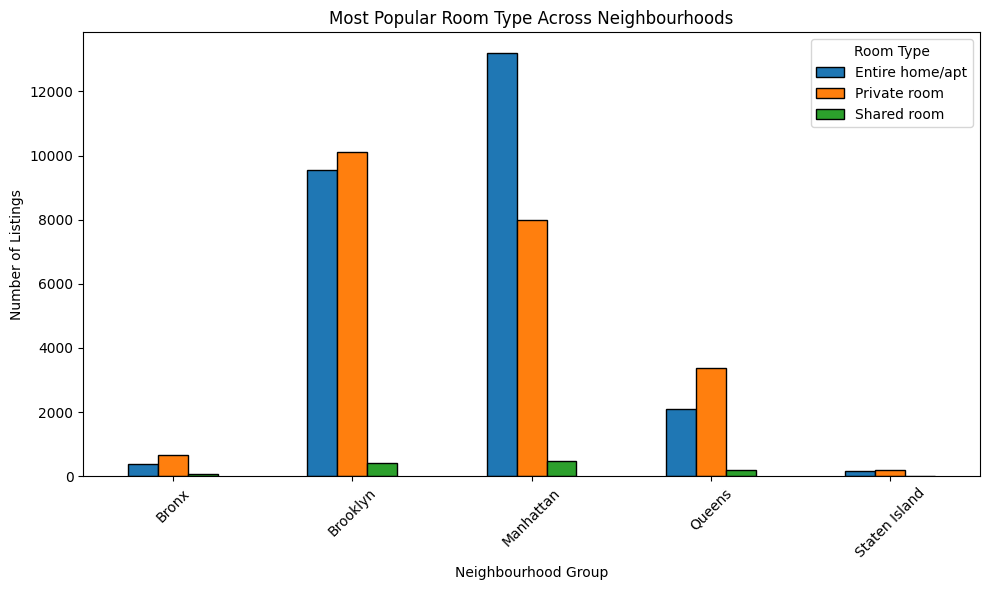

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Understanding Customer Preferences


# TODO:
# 1. Group data by 'neighbourhood_group' and 'room_type', count listings, and reshape with unstack().
# 2. Fill any missing values with 0 for better visualization.
# 3. Create a bar plot to visualize room type popularity across neighborhoods:
#    - Set appropriate figure size.
#    - Use a colormap for visual appeal.
#    - Rotate x-axis labels for readability.
#    - Add title, axis labels, and legend.
#    - Display the plot.
# Grouped the data by neighbourhood_group and room_type, counted listings and reshaped with unstack
grouped_df = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()

# Plot the Graph
grouped_df.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title("Most Popular Room Type Across Neighbourhoods")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.legend(title="Room Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_51/2024703800.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_new = df.groupby(['neighbourhood_group', 'price_range']).size().unstack()


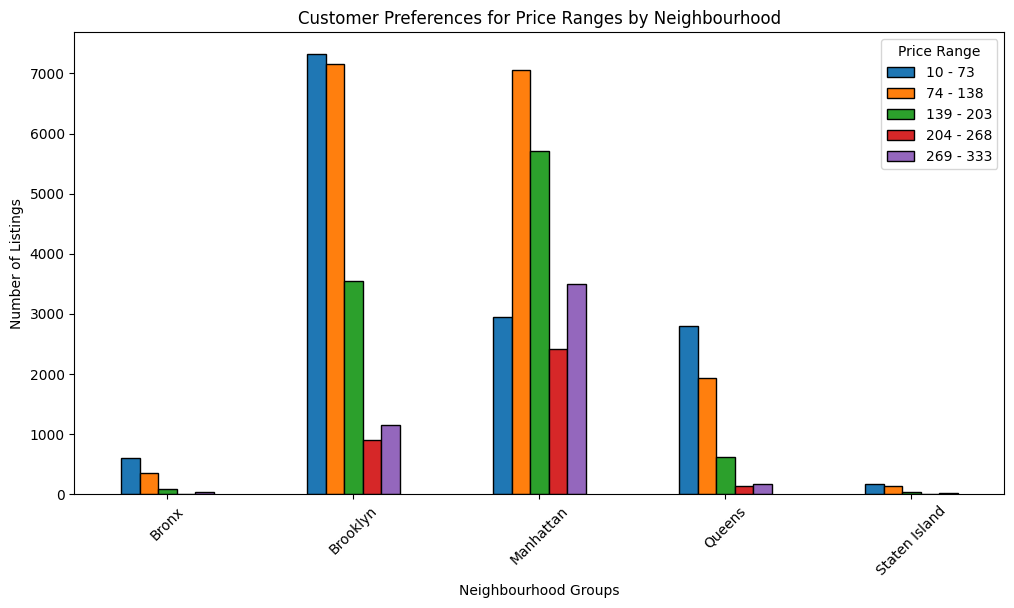

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Understanding Customer Preferences

# TODO:
# 1. Create a new column 'price_range' by binning the 'price' into defined ranges with labels.
# 2. Group the data by 'neighbourhood_group' and 'price_range', then count listings and reshape using unstack().
# 3. Fill missing values with 0 for visualization consistency.
# 4. Generate a bar plot to show price range preferences across neighborhoods:
#    - Set figure size and use a distinct colormap.
#    - Rotate x-axis labels for clarity.
#    - Add title, axis labels, and legend.
#    - Display the plot.


# Identified the max and min values
max_val = df['price'].max()
min_val = df['price'].min()

# Identified the bins and labels
bins = np.linspace(min_val, max_val, 6)
labels = [f"{int(bins[i])} - {int(bins[i+1]-1)}" for i in range(len(bins) - 1)]

# created new column price_range with predefined bins and labels
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Group the data by neighbourhood_group and price_range
grouped_new = df.groupby(['neighbourhood_group', 'price_range']).size().unstack()

# Plot the chart
grouped_new.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Customer Preferences for Price Ranges by Neighbourhood')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title="Price Range")
plt.show()



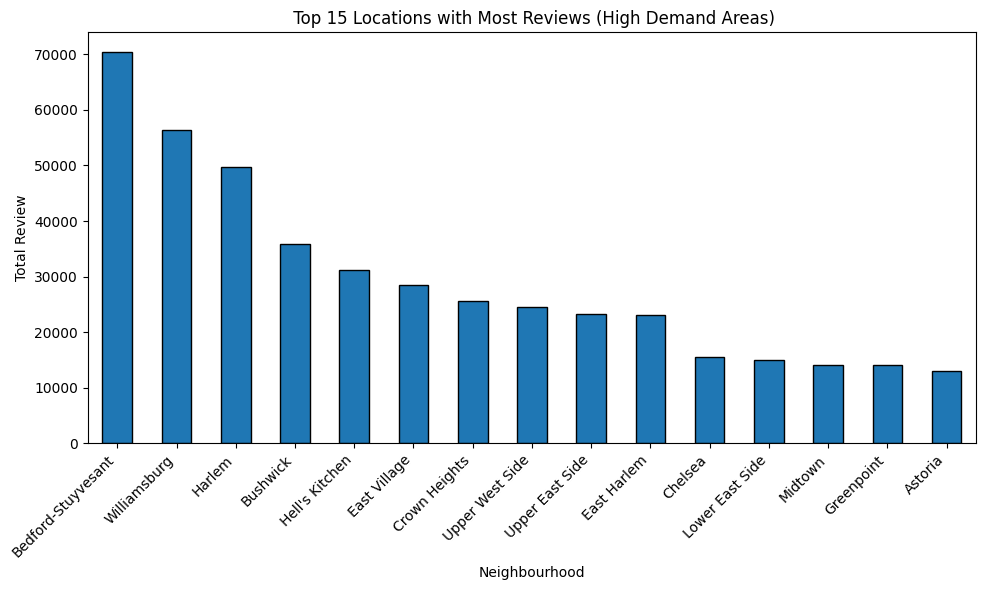

In [ ]:

# TODO:
# 1. Group the data by 'neighbourhood' and sum the 'number_of_reviews' to find total reviews per area.
# 2. Sort the result in descending order to identify high-demand locations.
# 3. Create a bar plot for the top 15 neighborhoods with the most reviews:
#    - Set appropriate figure size and bar color.
#    - Rotate x-axis labels for readability.
#    - Add title, axis labels, and display the plot.


import matplotlib.pyplot as plt

# 1. Group by neighbourhood and sum reviews
grouped_rev = df.groupby('neighbourhood')['number_of_reviews'].sum()

# 2. Sort in descending order
grouped_rev_desc = grouped_rev.sort_values(ascending=False)

# Extracting top 15 neighbourhoods data
top_15 = grouped_rev_desc.head(15)

# Plot the chart
plt.figure(figsize=(10, 6))
top_15.plot(kind='bar', edgecolor='black')
plt.title(' Top 15 Locations with Most Reviews (High Demand Areas)')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Review')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Pricing Startegy Analysis

/tmp/ipykernel_51/1803132916.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


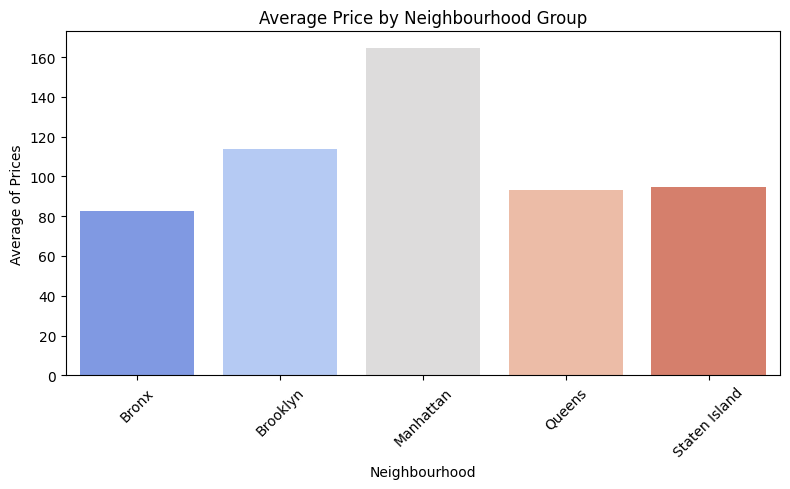

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pricing Strategy Analysis

# TODO:
# 1. Group the data by 'neighbourhood_group' and calculate the average price.
# 2. Reset the index to prepare for plotting.
# 3. Create a bar plot showing average price per neighborhood group:
#    - Use a distinct color for the bars.
#    - Add a title and axis labels.
#    - Display the plot.

# Grouped the data by neighbourhood and calculated the average price
grouped_avg = df.groupby('neighbourhood_group')['price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=grouped_avg,
    x = 'neighbourhood_group',
    y = 'price',
    palette = 'coolwarm'
)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood')
plt.ylabel('Average of Prices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_51/3171603073.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


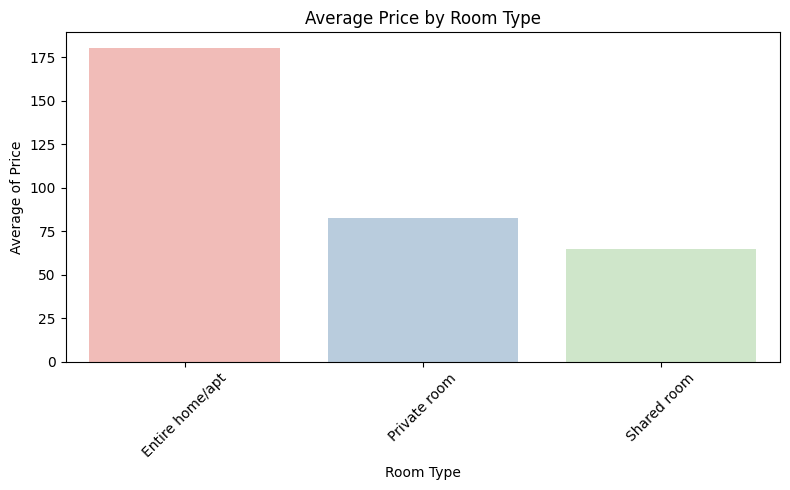

In [ ]:
# TODO:
# 1. Group the data by 'room_type' and calculate the average price.
# 2. Reset the index to prepare the data for plotting.
# 3. Create a bar plot to show how average price varies by room type:
#    - Set figure size and choose a bar color.
#    - Add a title and axis labels.
#    - Display the plot.

import matplotlib.pyplot as plt
import seaborn as sns

grouped_ro = df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=grouped_ro,
    x = 'room_type',
    y = 'price',
    palette = 'Pastel1'
)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average of Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


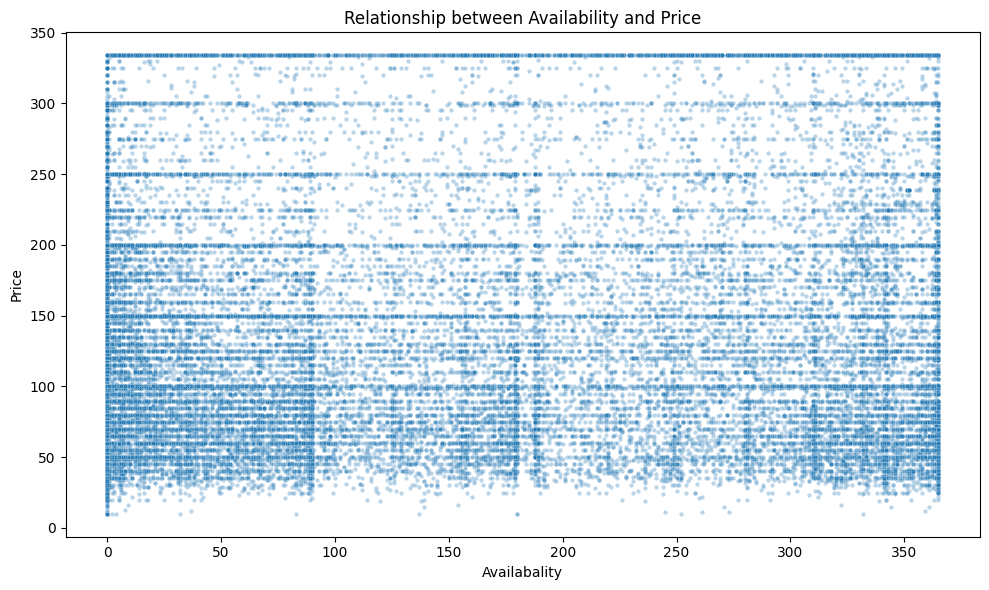

In [ ]:
# TODO:
# 1. Create a scatter plot to visualize the relationship between 'availability_365' and 'price'.
#    - Set figure size, point transparency (alpha), and color.
#    - Use seaborn's scatterplot for better aesthetics.
# 2. Add title and axis labels to clearly describe the plot.
# 3. Display the plot.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x = 'availability_365',
    y = 'price',
    alpha=0.3,
    s=10      
)
plt.title('Relationship between Availability and Price')
plt.xlabel('Availabality')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


## Growth opportunity Analysis

/tmp/ipykernel_51/1700772532.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


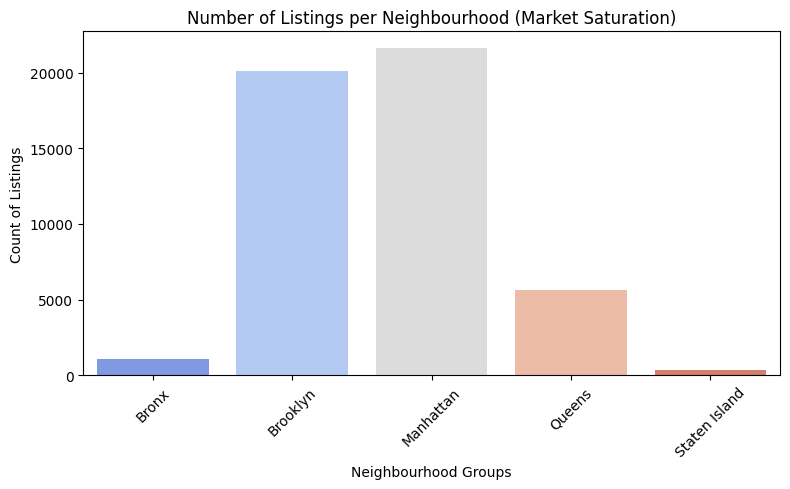

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Market Competition & Growth Opportunities

# TODO:
# 1. Count the number of listings per 'neighbourhood_group' to assess market saturation.
# 2. Reset the index and rename columns for clarity.
# 3. Create a bar plot to visualize the number of listings per neighborhood group:
#    - Set figure size and choose a distinct bar color.
#    - Rotate x-axis labels for better readability.
#    - Add title and axis labels.
#    - Display the plot.

# counted the number of listings and use reset index to assess market saturation
listing_counts = df.groupby('neighbourhood_group').size().reset_index(name='count')
listing_counts = listing_counts.set_index('neighbourhood_group')


plt.figure(figsize=(8, 5))
sns.barplot(
    data=listing_counts,
    x = 'neighbourhood_group',
    y = 'count',
    palette = 'coolwarm'
)
plt.title('Number of Listings per Neighbourhood (Market Saturation)')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_51/4164963044.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


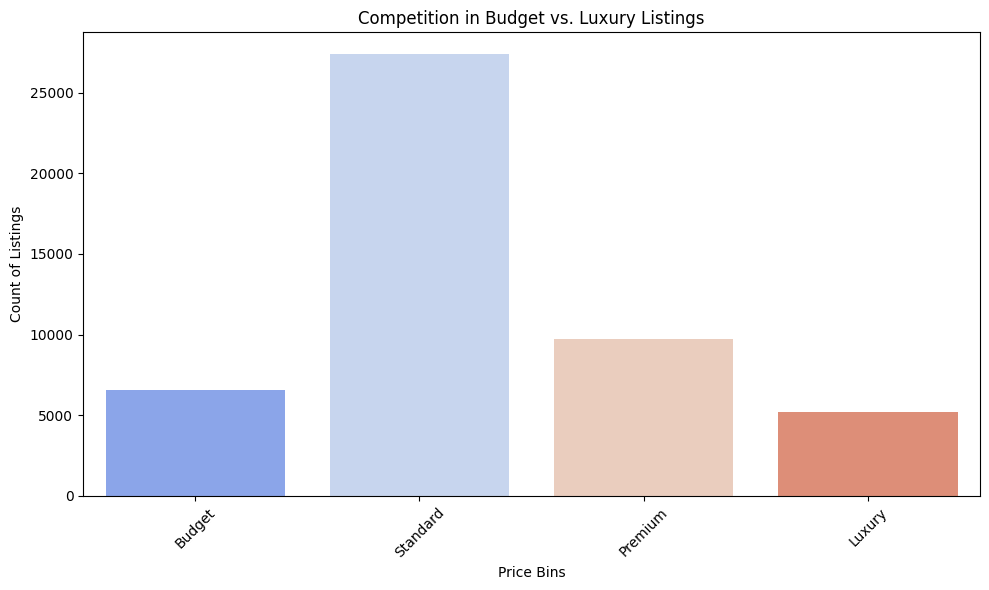

In [ ]:
# TODO:
# 1. Create a new column 'price_category' by binning the 'price' into defined categories (e.g., Budget, Luxury).
# 2. Count the number of listings in each price category to understand market competition.
# 3. Rename the resulting columns for clarity.
# 4. Create a bar plot to visualize the distribution of listings across price categories:
#    - Set figure size and bar color.
#    - Rotate x-axis labels for readability.
#    - Add title and axis labels.
#    - Display the plot.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

min_price = df['price'].min()
max_price = df['price'].max()

bins = [min_price-1, 50, 150, 250, max_val]
labels = ['Budget', 'Standard', 'Premium', 'Luxury']

df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# Get counts of each price category
price_counts = df['price_category'].value_counts().reset_index()
price_counts.columns = ['price_category', 'count']

# plot the chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=price_counts,
    x='price_category',
    y='count',
    palette='coolwarm'
)
plt.title('Competition in Budget vs. Luxury Listings')
plt.xlabel('Price Bins')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

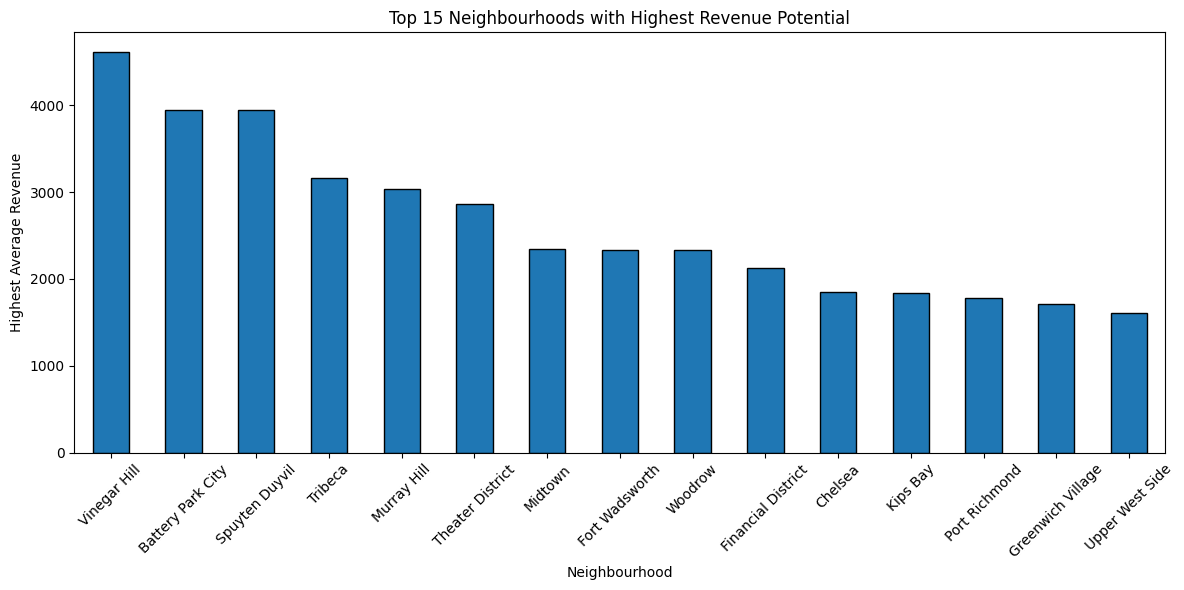

In [ ]:
# TODO:
# 1. Create a new column 'total_revenue' by multiplying 'price' with 'minimum_nights'.
# 2. Group data by 'neighbourhood' and calculate average total revenue to estimate potential earnings.
# 3. Sort the neighborhoods by revenue potential in descending order.
# 4. Create a bar plot for the top 15 neighborhoods with the highest average revenue:
#    - Set figure size and bar color.
#    - Rotate x-axis labels for readability.
#    - Add title and axis labels.
#    - Display the plot.
import matplotlib.pyplot as plt
import seaborn as sns


# creating a new column called total revenue
df['total_revenue'] = (df['price'] * df['minimum_nights'])

# Grouping the data by neighbourhood and calculate average total revenue
avg_rev = df.groupby('neighbourhood')['total_revenue'].mean()

# sort the neighbourhoods by revenue potential
sorted_avg_rev = avg_rev.sort_values(ascending=False)

# extract the data for top 15 neighbourhoods
top_15 = sorted_avg_rev.head(15)
top_15

# Creating a bar plot for top 15 neighbourhoods with highest average revenue
plt.figure(figsize=(12, 6))
top_15.plot(kind='bar', edgecolor='black')
plt.title('Top 15 Neighbourhoods with Highest Revenue Potential')
plt.xlabel('Neighbourhood')
plt.ylabel('Highest Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()